# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



### Not for Grading

### Spectrogram of Sine waves:
A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time.
A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the colour or brightness.A sine wave consists of a single frequency only, and its spectrum is a single point. Theoretically, a sine wave exists over infinite time and never changes. The objective of this experiment is to visualize the various spectrograms of sine waves of different frequencies and also combination different sine waves.

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P18_test" #@param {type:"string"}

In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "912345678" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython

ipython = get_ipython()
  
notebook="M1W2_CS_9_Spectrogram_Sine_Waves" #name of the notebook
Answer = "Ungraded"
def setup():
    ipython.magic("sx pip install playsound")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


###Importing required packages

In [0]:
import librosa
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

###Defining the sine waves with frequencies f = 40k, f = 30k, f = 20k and the combination of these waves

In [0]:
fs = 1e6
N = 1e5
amp = 2 * np.sqrt(2)
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier1 = amp * np.sin(2*np.pi*40e3*time)
carrier2 = amp * np.sin(2*np.pi*30e3*time)
carrier3 = amp * np.sin(2*np.pi*20e3*time)  
x = carrier1 + carrier2 + carrier3 

###Defining a function to plot spectrograms of the respective sine waves

In [0]:
def plot_sin(time, t, amp, sf, f, spgm=False):
    plt.figure(figsize=(5,5))
    plt.xticks([])
    plt.yticks([])
    plt.plot(time[:t],amp[:t])
    name = 'sine_wave_'+str(f)+'.png'
    plt.savefig(name)
    plt.show()
    if spgm:
        name = 'spectrogram_'+str(f)+'.png'
        plt.ylim([0,50000])
        fs, ts, Sxx = signal.spectrogram(amp, sf)
        plt.pcolormesh(ts, fs, Sxx, cmap = 'viridis')
        name = 'Spectrogram_'+str(f)+'.png'
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        plt.savefig(name)
    plt.show()

###Plotting the sine waves and their respective spectrograms

From the below plots, wecan observe that any wave is a combination of many sine waves

80


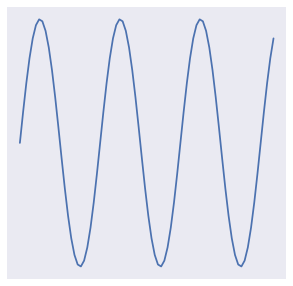

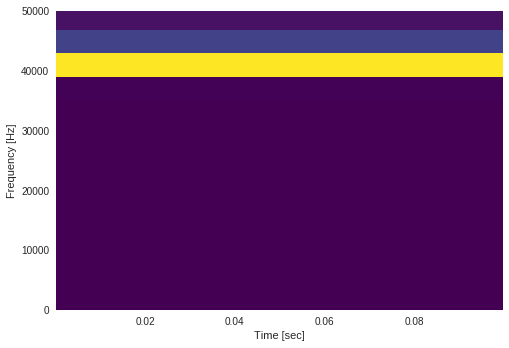

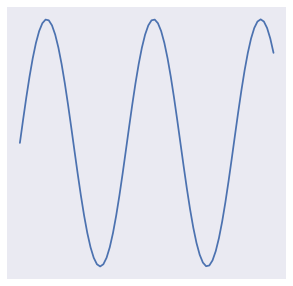

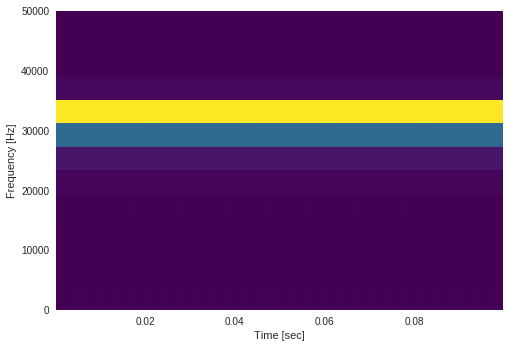

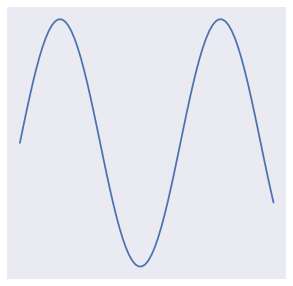

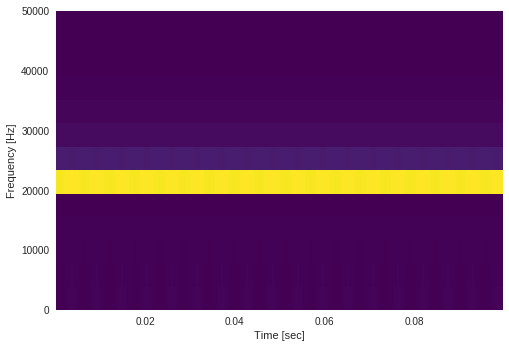

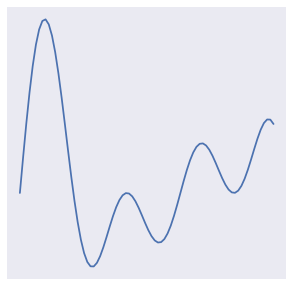

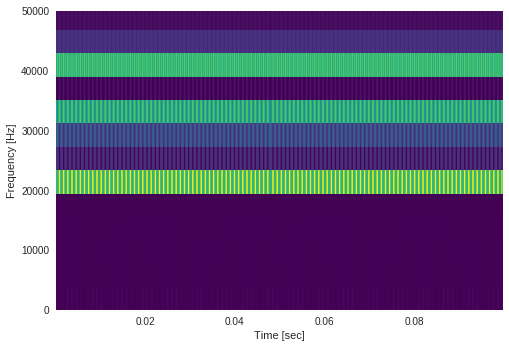

In [0]:
t = np.where(time<0.00008)[0].shape[0]
print(t)
plot_sin(time,t,carrier1,fs, 40000, spgm=True)
plot_sin(time,t,carrier2,fs, 30000, spgm=True)
plot_sin(time,t,carrier3,fs, 20000, spgm=True)
plot_sin(time,t,x,fs, 123,spgm=True)

### Please answer the questions below to complete the experiment:




In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "test'\"" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 21346
Date of submission:  24 Mar 2019
Time of submission:  10:14:06
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
